# Bouding Boxes
Splitting the CIFAR 100 dataset up into seperate classes and then running a haar cascade classifier to see if we can get facial detection. 

In [21]:
import numpy as np
import cv2
import pandas as pd
from matplotlib import pyplot as plt

# Getting data from the human superclass

In [22]:
file_path = '../input/cifar-100-python/cifar-100-python/'
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

train = unpickle(file_path + 'train')
test = unpickle(file_path + 'test')

The CIFAR-100 dataset has 100 fine labels and 20 coarse labels. Since we only care about data where there are people in the image, we want to get rid of all the data where the coarse label does not equal 15, the people class. 

Loaded in this way, each of the batch files contains a dictionary with the following elements:
* data -- a 10000x3072 numpy array of uint8s. Each row of the array stores a 32x32 colour image. The first 1024 entries contain the red channel values, the next 1024 the green, and the final 1024 the blue. The image is stored in row-major order, so that the first 32 entries of the array are the red channel values of the first row of the image.
* labels -- a list of 10000 numbers in the range 0-9. The number at index i indicates the label of the ith image in the array data.

In [23]:
#Making a dico with both the training and test datasets
data = dict(train)
data.update(test)

Lets look at how this data is set up. 

In [24]:
data.keys()

dict_keys([b'filenames', b'batch_label', b'fine_labels', b'coarse_labels', b'data'])

So coarse labels contain the super classes for the CIFAR 100, dataset, the one of these we are interested in is people so we can select all of those and add them to a new array. 

In [25]:
labels = data[b'coarse_labels']
pics = data[b'data']
#pics.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")
people = []
for i in range(0,len(labels)):
    if(labels[i] == 14): #Its a person
        people.append(pics[i])

# Having a look at our images

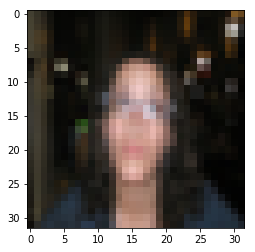

In [26]:
test_img = people[5].reshape(3,32,32) #4
# For some reason the channels get mixed up and the image needs transposing 
plt.imshow(np.transpose(test_img, (1, 2, 0)),interpolation='nearest')

# Looking at 10 of these images
We can see that some of them have faces as they are zoomed in. However some of the pictures like the above are so low quality and zoomed out that you cannot make out any facial features. 

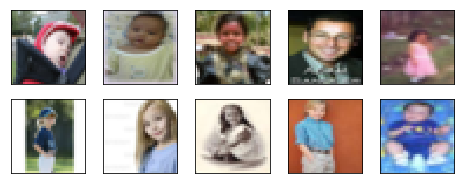

In [27]:
# Print 10 random images for 10 random classes 
fig = plt.figure(figsize=(8,3))
for i in range(10):
    num = np.random.randint(500)
    ax = fig.add_subplot(2,5,1 + i, xticks=[],yticks=[])
    img_num = np.random.randint(500)
    im = np.transpose(people[num].reshape(3,32,32), (1, 2, 0))
    plt.imshow(im)
plt.show()

Getting the haar cascade file. 

In [28]:
%%bash
wget https://raw.githubusercontent.com/shantnu/FaceDetect/master/haarcascade_frontalface_default.xml

--2019-01-10 10:46:40--  https://raw.githubusercontent.com/shantnu/FaceDetect/master/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml.2’

     0K .......... .......... .......... .......... ..........  5% 1.73M 0s
    50K .......... .......... .......... .......... .......... 11% 5.34M 0s
   100K .......... .......... .......... .......... .......... 16% 12.2M 0s
   150K .......... .......... .......... .......... .......... 22% 5.80M 0s
   200K .......... .......... .......... .......... .......... 27% 9.99M 0s
   250K .......... .......... .......... .......... .......... 33% 7.10M 0s
   300K .......... .......... .......... .......... .......... 38% 10

### Defening a function for facial detection

In [29]:
def faceDetect(image, i):
    # Read the image
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Detect faces in the image
    faces = faceCascade.detectMultiScale(
        gray,
        scaleFactor=1.1, #1.1
        minNeighbors=5,
        minSize=(5, 5),
        flags = cv2.CASCADE_SCALE_IMAGE
    )
    
    if (len(faces) > 0):
        print("Image", i, "Found",len(faces),"faces!")
        #Draw a rectangle around the faces
        for (x, y, w, h) in faces:
            image = np.ascontiguousarray(image, dtype=np.uint8)
            cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 1)

    plt.imshow(image)

# Does it work?
Doing a test run on an image:

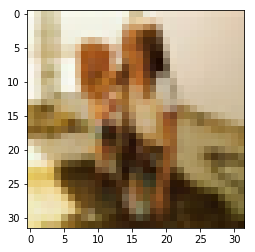

In [30]:
testImg = people[4].reshape(3,32,32)
testImg = np.transpose(testImg, (1, 2, 0))
faceCascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
faceDetect(testImg,4)

A lot of these images are not detailed enough in to have proper facial features. Therefore I think the haar cade classifier will not detect them as it will have been trained on higher resolution images. I think the next step forward is to create my own haar cascade classifier using the test and training datasets.

# Will it work on any image?
The below code will run the function on every single image in the dataset. 
So you dont have to see all the ones that do not work, we will only print something when it does. 

Image 86 Found 1 faces!
Image 181 Found 1 faces!


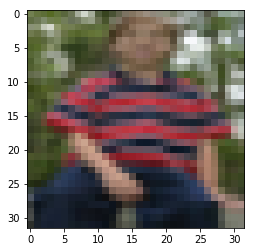

In [31]:
for i in range(0,len(people)):
    testImg = people[i].reshape(3,32,32)
    testImg = np.transpose(testImg, (1, 2, 0))
    faceCascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    faceDetect(testImg, i)

86 Found 1 faces!
3 1 27 27
181 Found 1 faces!
3 3 26 26


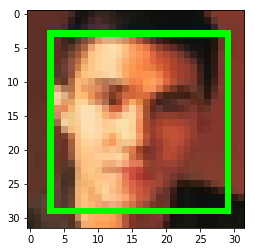

In [32]:
for i in range(0,len(people)):
    testImg = people[i].reshape(3,32,32)
    image = np.transpose(testImg, (1, 2, 0))
    faceCascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Detect faces in the image
    faces = faceCascade.detectMultiScale(
        gray,
        scaleFactor=1.1, #1.1
        minNeighbors=5,
        minSize=(5, 5),
        flags = cv2.CASCADE_SCALE_IMAGE
    )

    if (len(faces) > 0):
        print(i,"Found",len(faces),"faces!")
        #Draw a rectangle around the faces
        for (x, y, w, h) in faces:
            print(x,y,w,h)
            image = np.ascontiguousarray(image, dtype=np.uint8)
            cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 1)

        plt.imshow(image)

Image 86 Found 1 faces!


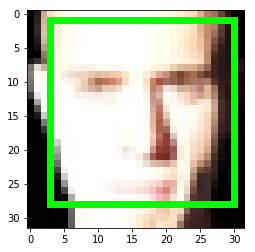

In [34]:
testImg = people[86].reshape(3,32,32)
testImg = np.transpose(testImg, (1, 2, 0))
faceCascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
faceDetect(testImg,86)

I believe the only reason why this image gets detected is that it is so zoomed in, so you can recognise the features such as eyes, nose and mouth. 